### Video Loading Tests

This file is for testing my methods for loading in the video data and manipulating it so that is ready for analysis/training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120
import cv2 # OpenCV
import os

import Settings # My global settings
import Preprocessing # Work with the raw data
import Sampling

In [2]:
Preprocessing.testData()

Searching for data in location specified by Settings.DATA_LOCATION:
/run/media/jack/Seagate Portable Drive/Research/geogran2/
...
Found 55 possible data files using listDataFiles()
Verified 55 properties files exist
Example of property file keys:
dict_keys(['name', 'velocity', 'shearspringname', 'normalspringname', 'numpart', 'boundary', 'starttime', 'goodtime', 'endtime'])

Verified 55 mat files exist
Example of mat file keys:
dict_keys(['t', 'x', 'f', 'fn', 'good', 'multipeak', 'time', 'position', 'force', 'duration', 'slip', 'deltaF', 'work'])

Found 26 data files with movies using listDataFiles(True)
Verified 26 movies exist


True

In [2]:
dataFiles = Preprocessing.listDataFiles(excludeDataWithoutMovies=True)
#matFile = Preprocessing.loadMatFile(dataFiles[0])
#video = Preprocessing.loadVideo([dataFiles[0], dataFiles[7], dataFiles[18]], ignoreInvalidData=True)

propertyFiles = Preprocessing.loadRunData(dataFiles)
videos = Preprocessing.loadVideo(dataFiles)
matFiles = Preprocessing.loadMatFile(dataFiles)

In [8]:
print(propertyFiles[0])
print(len(matFiles[0]["good"]))

v = videos[0]

ret, frame = v.read()

print(np.mean(frame[:,:,0]))


{'name': '070330b', 'velocity': 0.05, 'shearspringname': 'D', 'normalspringname': '#1', 'boundary': '', 'starttime': 15.0, 'endtime': 650.0, 'fps': 4.0, 'pixpermm': 1.8, 'type': "{'creep'}", 'goodarea': array([ 90, 697,  79, 493]), 'centerline': 270.0, 'numpart': 'N'}
451
51.246403827751195


In [3]:
Sampling.playVideo(videos[0], propertyFiles[0])

346

In [17]:
print(345*1.92)

662.4


070330b


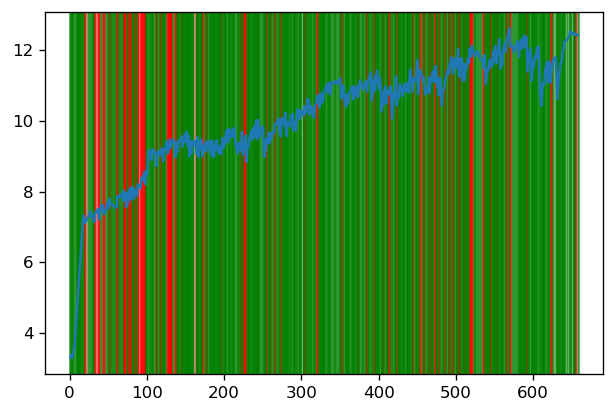

In [10]:
print(dataFiles[0])
peakTimes = [matFiles[0]["time"][i] for i in range(len(matFiles[0]["time"])) if bool(matFiles[0]["multipeak"][i])]
slipTimes = [matFiles[0]["time"][i] for i in range(len(matFiles[0]["time"])) if not bool(matFiles[0]["multipeak"][i])]
for p in peakTimes:
    plt.axvline(p, color='r', alpha=.8)
for s in slipTimes:
    plt.axvline(s, color='g', alpha=.8)
    
#plt.plot(matFiles[0]["t"], matFiles[0]["f"])
plt.plot(matFiles[0]["time"], matFiles[0]["force"])

plt.show()